In [4]:
import tensorflow as tf

import matplotlib.pyplot as plt

2023-09-20 22:34:55.909300: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 22:34:59.619112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 22:34:59.688775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 22:35:11.133579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import sys
sys.path.append('../')

from utils import normalize, create_mask

In [6]:
model = tf.keras.models.load_model("coco_set_unet_semantic_segmentation_3_epochs_128_128.keras")

In [7]:
image_path = "../test_imgs/ILSVRC2012_test_00002863.jpg"

In [8]:
image = tf.image.decode_image(open(image_path, "rb").read())

w, h, _ = image.shape

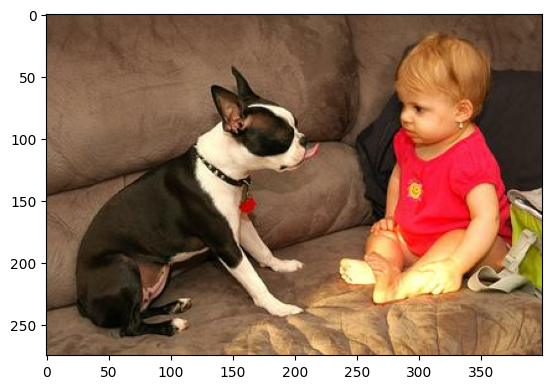

In [9]:
plt.imshow(image)

In [10]:
image = tf.image.resize(image, (128, 128))

image = normalize(image, 1)[0]

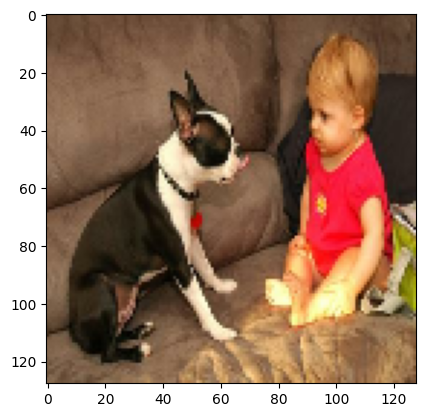

In [11]:
plt.imshow(image)

In [12]:
pred_img = create_mask(model.predict(tf.expand_dims(image, 0)))
pred_img = tf.cast(pred_img, tf.float32)

1/1 [==============================] - 5s 5s/step


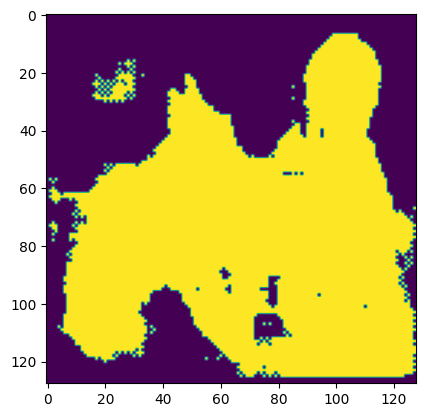

In [13]:
plt.imshow(pred_img)

In [14]:
masked_img =  image * pred_img
res_masked_img = tf.image.resize(masked_img, (w, h))


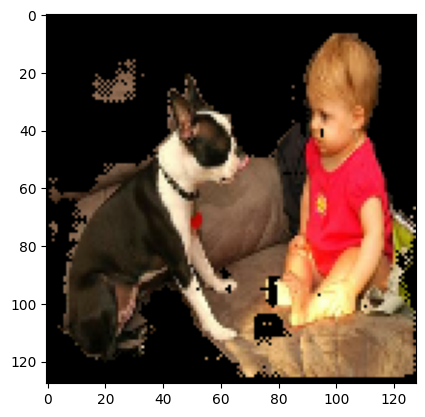

In [15]:
plt.imshow(masked_img)

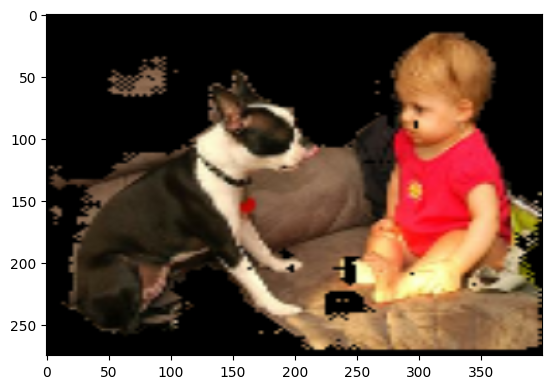

In [16]:
plt.imshow(res_masked_img)